In [47]:
import csv
import numpy as np
import matplotlib.pyplot as plt

filename = 'utrecht.csv'

columns = {}
rows = []
data = {}

# hulp functie om te kijken of de waarde een integer is
def is_number(s):
    try:
        int(s)
        return True
    except ValueError:
        return False

with open(filename) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=';')
    line_count = 0
    for row in csv_reader:
        # anders reageren als het de eerste regel is, dat zijn namelijk de kolomnamen
        if line_count == 0:
            line_count += 1
            i = 0
            for c in row:
                columns[c] = i
                data[i] = []
                i += 1
        else:
            line_count += 1
            # alleen importeren als het maanddata is, niet de cummulatieven over een jaar
            if 'JJ00' in row[columns['Perioden']]:
                pass
            else:
                rows.append(row)
                i = 0
                for c in row:
                    if is_number(c):
                        data[i].append(int(c))
                    else:
                        data[i].append(c)
                    i = i+1
    print(f'Processed {line_count} lines.')

Processed 224 lines.


## Berekenen van het Gemiddelde, Mediaan, Modus en de Standaarddeviatie

Met de onderstaande Functie kunnen we gemakkelijk het mediaan berekeken.

In [114]:
def Mediaan(lijst):
    lst = lijst[:]
    while len(lst) > 2:
        lst.pop(0)
        lst.pop(-1)
    if len(lst) == 2:
        mediaan = (lst[0]+lst[1])/2
    else:
        mediaan == lst[0]
    return mediaan

Met de onderstaande Functie kunnen we gemakkelijk het gemiddelde berekeken.

In [115]:
def Gemiddelde(lijst):
    lst = lijst[:]
    som = 0
    aantal_getallen =0
    while len(lst) != 0:
        som += lst.pop(0)
        aantal_getallen += 1
    som = som/aantal_getallen
    som = round(som,2)
    return som, aantal_getallen

Met de onderstaande Functie kunnen we gemakkelijk het modus berekeken. hierbij maken we gebruik van een key_in_dict die bij houd hoevaak het getal voorkomt in een dictionairy

In [116]:
def key_in_dict(key, dict):
    if key not in dict.keys():
        dict.update({key: 1})
    elif key in dict.keys():
        dict.update({key: (dict.get(key) + 1)})
    
def Modus(lijst):
    dict={}
    for getal in lijst:
        key_in_dict(getal, dict)
    meest_voorkomend= [0,0]
    for getal in dict:
        if meest_voorkomend[1] < dict.get(getal):
            meest_voorkomend = [getal,dict.get(getal)]    
    return (meest_voorkomend[0])

Met de onderstaande Functie berekenen we de Standaarddeviatie.

In [118]:
def Standaarddeviatie(lijst):
    gem = Gemiddelde(lijst)[0]
    aantal_getalllen = Gemiddelde(lijst)[1]
    lst = lijst[:]
    lst2 =[]
    while len(lst) != 0:
        lst2.append(lst.pop(0)-gem)    
    while len(lst2) !=0:
        lst.append(lst2[0]*lst2.pop(0))
    d = Gemiddelde(lst)[0]
    return round(np.sqrt(d),2)

Deze onderstaande functie print mooi de gegeven statistieken uit waarbij alle bovenstaande functies gebruikt worden

In [233]:
def printtekst(naam, data):
    print("Statistieken van de {} in Utrecht\n\het gemiddelde:\t\t{}\nde Mediaan:\t\t\t{}\nhet Modus:\t\t\t{}\nen de Standaarddeviatie:\t{}\n"
      .format(naam,Gemiddelde(data)[0],Mediaan(data),Modus(data),Standaarddeviatie(data)))
    
printtekst("geboren kinderen",data[columns['LevendGeborenKinderen_2']])
printtekst("overledenen",data[columns['Overledenen_3']])


Statistieken van de geboren kinderen in Utrecht
\het gemiddelde:		396.03
de Mediaan:			462.5
het Modus:			392
en de Standaarddeviatie:	38.55

Statistieken van de overledenen in Utrecht
\het gemiddelde:		158.55
de Mediaan:			138.5
het Modus:			156
en de Standaarddeviatie:	18.57



## een trendlijn maken en plotten

Met de numpy functie polyfit en poly1d kunnen we een lijn opstellen die de trendlijn is van de bevolkings groei van het jaar 2018.

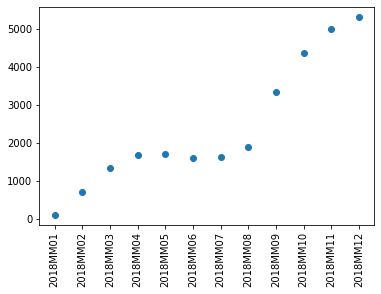

In [230]:
x = data[columns['Perioden']][-14:-2]
y = data[columns['BevolkingsgroeiSinds1Januari_13']][-14:-2]
plt.plot(x,y,'o')
plt.xticks(rotation=90)
plt.show()

Nu maken we een trendlijn voor deze stippel grafiek. doormiddel van de gemaakte functie Lineare_lijn() die de a en b waardes van de standaard lineaire formule berekent(y=ax+b). zodat er daarna een lijn geplot kan worden met matplotlib

de Formule van de trendlijn is:
	y=439.1643356643357x + -458.9848484848485


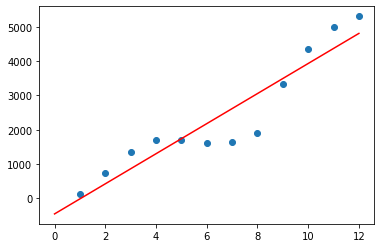

In [228]:
x = list(range(1,13))
y = data[columns['BevolkingsgroeiSinds1Januari_13']][-14:-2]
plt.plot(x,y,'o')

def Lineaire_lijn(X, Y):
    N = len(X)
    Vx = 0.0
    Vy = 0.0
    Vx2 = 0.0
    Vy2 = 0.0
    Vxy = 0.0
    for x, y in zip(X, Y):
        Vx += x
        Vy += y
        Vx2 += x*x
        Vy2 += y*y
        Vxy += x*y
    determinant = Vx2 * N - Vx * Vx
    return (Vxy * N - Vy * Vx)/determinant, (Vx2 * Vy - Vx * Vxy)/determinant


a,b = Lineaire_lijn(x,y)
print("de Formule van de trendlijn is:\n\ty={}x + {}".format(a,b))

x = np.linspace(0,12,100)
y = a*x+b
plt.plot(x, y, '-r')
plt.show()

nu kunnen we gemakkelijk zien dat de Bevolkingsgroei van 2018 behoorlijk was in de Gemeente Utrecht